In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("H:/Python In Data Science/Titanic_HSC/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df)

891

In [5]:
df.count() # we can find out missing data Ex.Age,cabin,Embarked

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
df['Age'].min(), df['Age'].max() # min value of age - passenger on board is baby valude is in year(0.42) and oldest person is of 80 years

(0.42, 80.0)

In [7]:
# check How many passengers survived 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# More than 61% passengers did not survived
df['Survived'].value_counts()*100/len(df) 

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [9]:
df['Sex'].value_counts() # Gender classification on ship

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Pclass'].value_counts() # Mejority of passengers belongs to 3rd class

3    491
1    216
2    184
Name: Pclass, dtype: int64

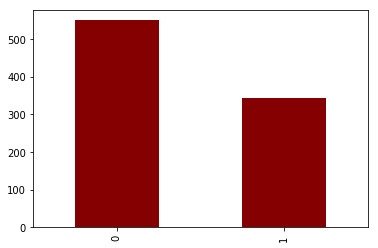

In [11]:
df['Survived'].value_counts().plot(kind='bar',color=['#850000'])

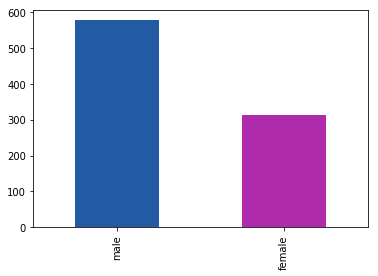

In [12]:
df['Sex'].value_counts().plot(kind='bar',color=['#225aa3','#af2bab'])

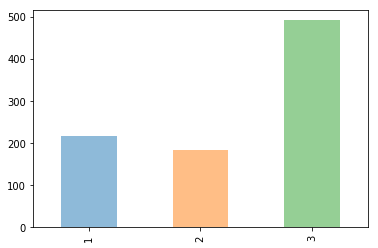

In [13]:
alpha_color=0.5 # defibe transperancy and opecity of given color

df['Pclass'].value_counts().sort_index().plot(kind='bar',alpha=alpha_color)

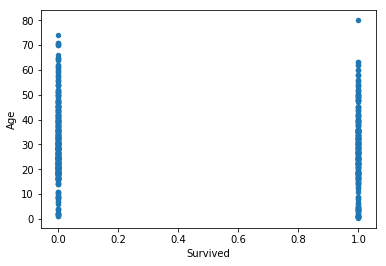

In [14]:
df.plot(kind='scatter',x='Survived', y='Age' ) # graph shows that survival details according to age
# Scatter plot is not good for this representation as survival is binary form

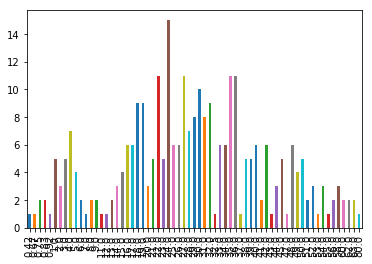

In [15]:
# representation of AGE of passengers who survived

df[df['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [16]:
# above representation is more difficult so we provide boundray to age and try to plot graph between them

boundry = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['AgeBucket'] = pd.cut(df['Age'], boundry)
df['AgeBucket'].value_counts()

(20, 30]     230
(30, 40]     155
(10, 20]     115
(40, 50]      86
(0, 10]       64
(50, 60]      42
(60, 70]      17
(70, 80]       5
(90, 100]      0
(80, 90]       0
Name: AgeBucket, dtype: int64

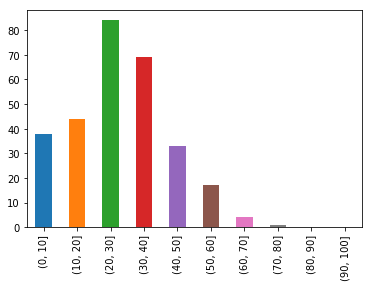

In [17]:
df[df['Survived'] == 1]['AgeBucket'].value_counts().sort_index().plot(kind='bar')

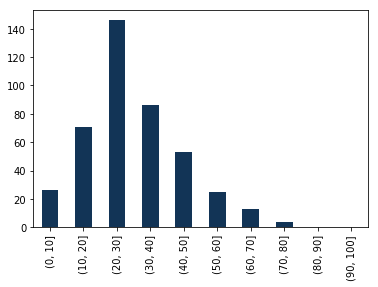

In [18]:
# representation of AGE distribution of passengers who did not survived
df[df['Survived'] == 0]['AgeBucket'].value_counts().sort_index().plot(kind='bar', color='#123456')

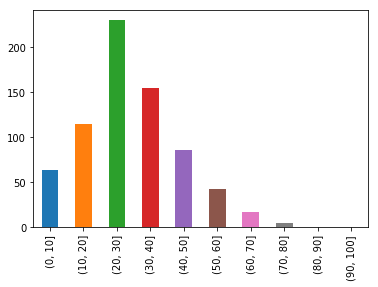

In [19]:
# plot for all passengers without introducing survival variable 
#-> it is same like previos hence we can say that AGE dosent tell us about servival 

df['AgeBucket'].value_counts().sort_index().plot(kind='bar')

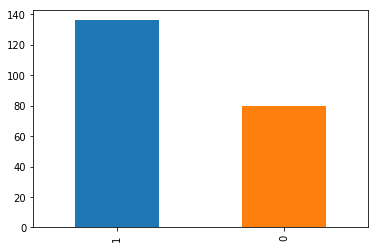

In [20]:
df[df['Pclass'] == 1]['Survived'].value_counts().plot(kind='bar') # Mejority of passenger in 1st class survived

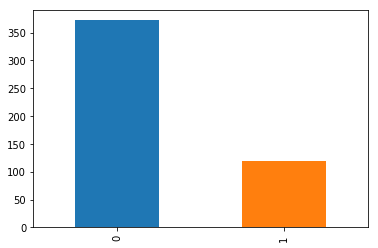

In [21]:
df[df['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar') # Mejority of passenger in 3rt class did not survived

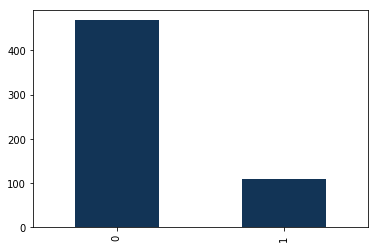

In [22]:
# Mejority of male passenger did not survived
df[df['Sex'] == 'male']['Survived'].value_counts().plot(kind='bar',color='#123456') 

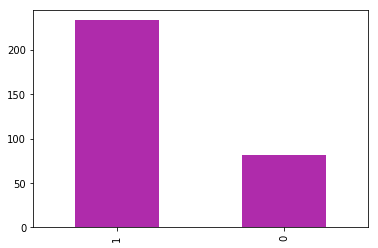

In [23]:
# Mejority of female passenger did survived
df[df['Sex'] == 'female']['Survived'].value_counts().plot(kind='bar', color='#af2bab')

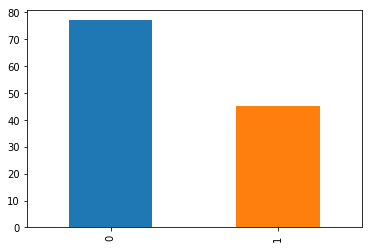

In [24]:
# we can check cross ref. of gender with class - >> Binary indexing
# male passender of first class survival - > result : Mejority of male  in 1st class did not survived
df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

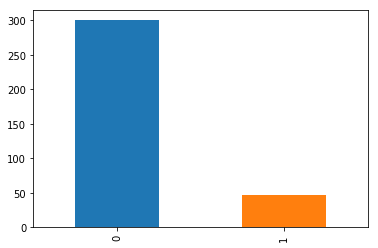

In [25]:
# ditribution is scewed.......MALE in 3rd class tough luck to survived 
df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

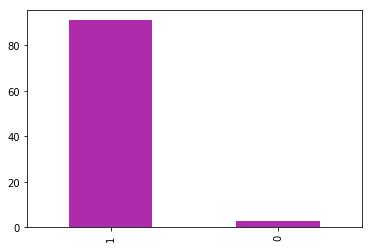

In [26]:
#Female in 1st class - > almost all survived
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar', color='#af2bab')

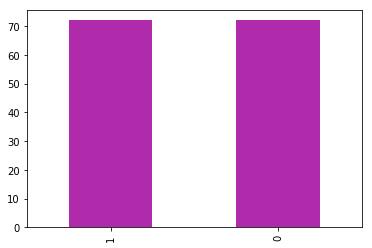

In [27]:
# distubition is 50-50 % 
df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar', color='#af2bab')

In [122]:
# Being a female passenger in 1st class have strong indication of survival
# Being a male passenger in 3rd class have stong indication of not survival
# Dependent Variables - PClass and Age where as Independent variable is - Survival 

In [36]:
df['Age'].fillna(0, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [48]:
new_df = df[['Pclass','Age','Sex']]
new_df.head()

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male


In [50]:
# we'll convert 'Sex' col. using LabelEncoder for calculation
from sklearn.preprocessing import LabelEncoder

la_sex = LabelEncoder()

new_df['new_sex'] = la_sex.fit_transform(new_df['Sex'])

new_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Age,Sex,new_sex
0,3,22.0,male,1
1,1,38.0,female,0
2,3,26.0,female,0
3,1,35.0,female,0
4,3,35.0,male,1


In [53]:
inputs_col = new_df.drop('Sex' , axis = 'columns')
inputs_col.head()

,Pclass,Age,new_sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [58]:
target_col=df[['Survived']]
target_col.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(inputs_col,target_col,test_size=0.2)

In [68]:
len(X_train)

712

In [70]:
len(X_test)

179

In [92]:
# use random forest classifier
# ensemble -> term use when we use multilpe algorithms to predict the outcome ,
# here we are building multiple decision trees and predict final outcome

from sklearn.ensemble import RandomForestClassifier
forest_titanic = RandomForestClassifier()
#forest_titanic = RandomForestClassifier(n_estimators=80)

In [93]:
forest_titanic.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
forest_titanic.score(X_test,y_test)

0.7988826815642458

In [97]:
from sklearn.externals import joblib  # Check with JOBLIB

In [98]:
joblib.dump(forest_titanic,'Rand_Mod_Titanic')# Model has been created

['Rand_Mod_Titanic']